## <span style="color:navy"> Esercitazione 8</span>

In questa esercitazione sfruttiamo il principio variazionale in fisica quantistica: il valore di aspettazione dell'operatore hamiltoniano $\langle {\hat H} \rangle_T$ è sempre maggiore o uguale al valore dell'energia di stato fondamentale $E_0$.


Considero una particella in una dimensione con potenziale dato da $V(x) = x^4 - \frac{5}{2}x^2$. Questo modello non è risolvibile analiticamente, perciò in questa esercitazione useremo metodi numerici di ottimizzazione per approssimare lo stato fondamentale di questo sistema.

Per ottenere la funzione d'onda approssimata, il metodo variazionale utilizza una funzione d'onda parametrizzata con due parametri variazionali da ottimizzare $\sigma$ e $\mu$
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

### <span style="color:teal"> Esercizio 8.1 </span>

In questo esercizio ho scritto un codice che sfrutta l'algoritmo di Metropolis per campionare il modulo quadro della nostra funzione d'onda di prova $|\Psi_T^{\sigma,\mu}(x)|^2$.

Una nuova posizione y viene accettata secondo la probabilità $P(x \to y) = \min\left(1, \frac{|\Psi_T(y)|^2}{|\Psi_T(x)|^2}\right)$

Utilizzando la tecnica del data blocking ho stimato poi l'energia associata alla funzione d'onda con i valori dei parametri variazionali da me scelti, nello specifico $\sigma=1.0$ e $\mu=0.5$.

Per svolgere questo compito ho implementato una classe "Energia" i cui tre metodi principali sono: "Equilibrio", in cui adatto il passo del Metropolis per fare in modo che l'accettanza sia fissata intorno al 50%, "Move", che esegue un passo del Metropolis, e "calcola_E_tot", che calcola l'energia associata al valore dei parametri $\sigma$ e $\mu$ (data membri della classe) utilizzando 100 blocchi da 1000 passi del Metropoilis ciascuno.

Di seguito riporto i grafici dell'accettanza e dell'andamento dell'energia in funzione dei blocchi:

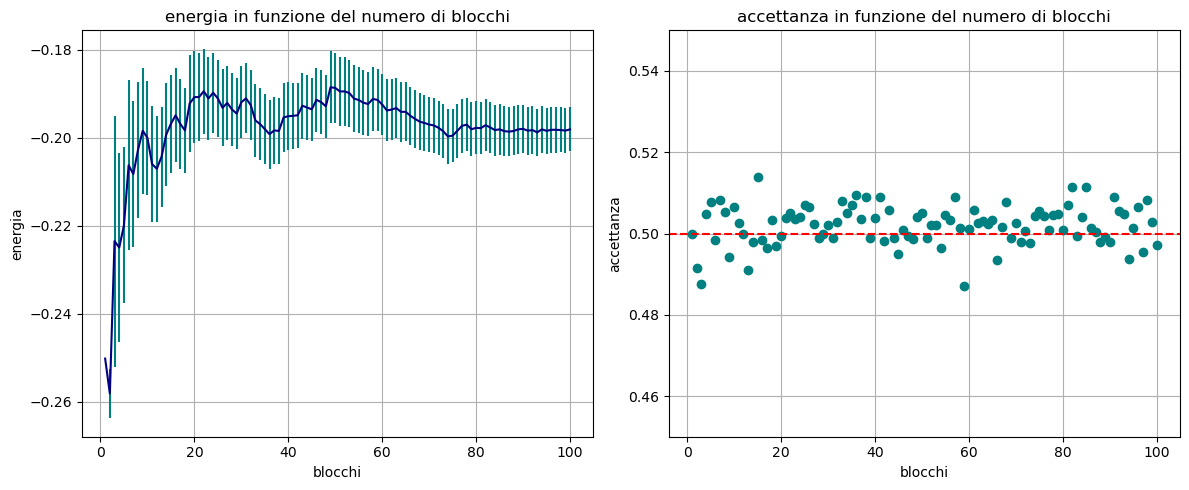

In [2]:
import numpy as np
import matplotlib.pyplot as plt



# Carico i dati
data_ene = np.loadtxt("energy.dat")
data_acc = np.loadtxt("acceptance.dat")


x = np.arange(1, data_ene.shape[0] + 1)

energia = data_ene[:,2]
errore_ene = data_ene[:,3]

accettanza = data_acc[:,1]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primo grafico: andamento energia in funzione dei blocchi
axs[0].errorbar(x, energia, yerr=errore_ene,color='navy', ecolor='teal')
axs[0].set_xlabel('blocchi')
axs[0].set_ylabel('energia')
axs[0].grid(True)
axs[0].set_title('energia in funzione del numero di blocchi')

# Secondo grafico: andamento accettanza in funzione dei blocchi
axs[1].plot(x, accettanza, marker='o', linestyle= 'none', color='teal')
axs[1].set_xlabel('blocchi')
axs[1].set_ylabel('accettanza')
axs[1].set_ylim(0.45, 0.55)
axs[1].axhline(y=0.5, color='red', linestyle='--', linewidth=1.5, label='Matrice')
axs[1].grid(True)
axs[1].set_title('accettanza in funzione del numero di blocchi')

plt.tight_layout()
plt.show()

Il grafico a sinistra mostra la tipica convergenza di una quantità calcolata utilizzando la media a blocchi, l'errore diminuisce con la radice del numero di blocchi e il valor medio si stabilizza.
Il grafico a destra certifica che durante tutta la simulazione l'accettanza è rimasta come desiderato intorno al 50%, prova di una corretta implementazione del metodo "Equilibrio"

### <span style="color:teal"> Esercizio 8.2 </span>

In questo secondo esercizio ho sfruttato la classe creata nel 8.1 per individuare i valori dei parametri variazionali associati alla $\Psi_T^{\sigma,\mu}(x)$ di stato fondamentale.

Per fare ciò abbiamo sfruttato l'algoritmo di ottimizzazione "Simulated Annealing" che simula il comportamento di un metallo a temperatura elevata che viene riscaldato **lentamente**. Infatti, se viene raffreddato troppo velocemente il metallo raggiunge in fretta un minimo locale (uno stato solido ricco di difetti). La chiave per il raggiungimento dello stato cristallino (minimo globale) è un raffreddamento lento che dia la possibilità agli atomi di posizionarsi in un reticolo perfetto.

Il Metropolis è un algoritmo che si presta perfettamente a questo utilizzo, infatti, la probabilità di accettare una configurazione peggiore è $p(\Delta E) \propto \exp\left(-\Delta E / T\right)$. Quindi, quando la temperatura è alta il sistema accetta con buona probabilità configurazioni peggiori esplorando in maniera completa lo spazio dei parametri. Via via che la temperatura diminuisce, accetta quasi solo configurazioni migliori.

Inoltre il passo del metropolis diminuisce con $T$, agevolando ancora di più la convergenza.

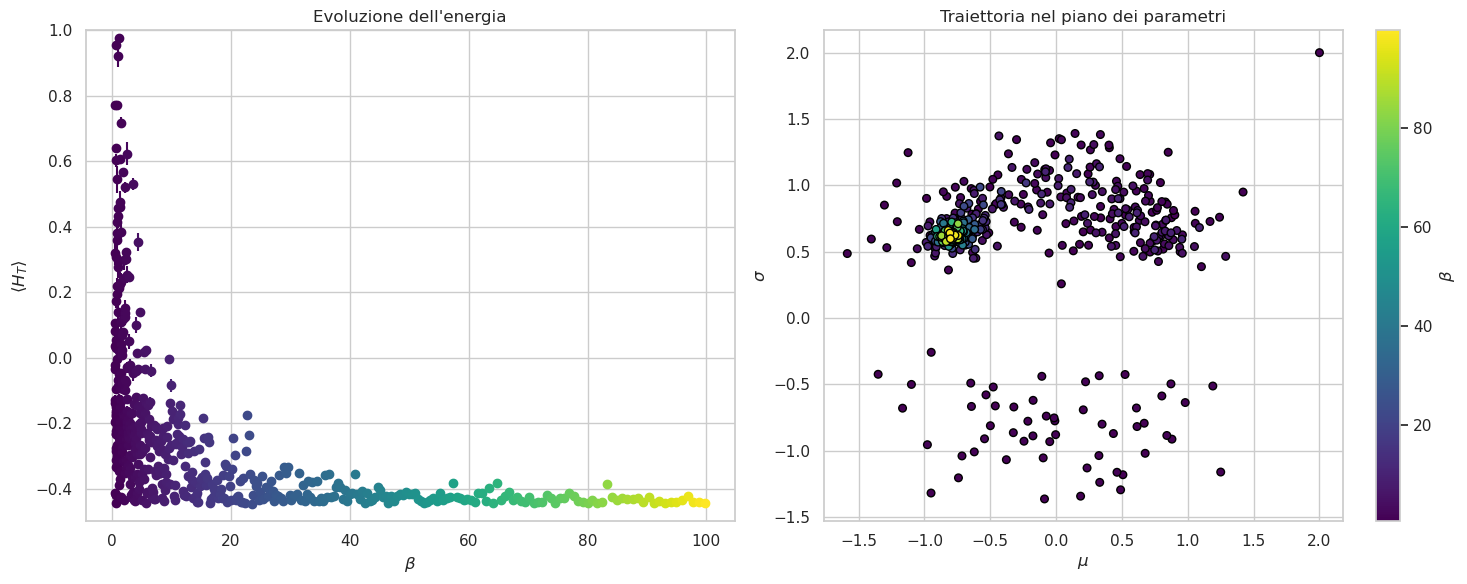

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Carica parametri da parameters.dat (Beta, Mu, Sigma)
data = np.loadtxt("parameters.dat", comments="#")
beta = data[:,1]
mu = data[:,2]
sigma = data[:,3]

# Carica energia e errore da energy_SA.dat (Beta, Energia, Errore)
energy_data = np.loadtxt("energy_SA.dat", comments="#")
beta_e = energy_data[:,1]
energy = energy_data[:,2]
err_energy = energy_data[:,3]

# Normalizza beta per il colormap
norm = plt.Normalize(beta.min(), beta.max())
cmap = plt.cm.viridis
colors = cmap(norm(beta))

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1)

# Plot 1: Energy vs Beta con colore variabile
for i in range(len(beta_e)):
    ax1.errorbar(beta_e[i], energy[i], yerr=err_energy[i], fmt='o', color=cmap(norm(beta_e[i])))

ax1.set_xlabel(r"$\beta$")
ax1.set_ylabel(r"$\langle H_T \rangle$")
ax1.set_ylim(-0.5,1)
ax1.set_title("Evoluzione dell'energia")
ax1.grid(True)

# Plot 2: Mu vs Sigma con colore da Beta
ax2 = fig.add_subplot(1, 2, 2)
sc = ax2.scatter(mu, sigma, c=beta, cmap='viridis', marker='o', s=30, edgecolor='k')
ax2.set_xlabel(r'$\mu$')
ax2.set_ylabel(r'$\sigma$')
ax2.set_title('Traiettoria nel piano dei parametri')
fig.colorbar(sc, ax=ax2, label=r'$\beta$')

plt.tight_layout()
plt.show()

Questi due grafici mostrano l'effettiva convergenza del Simulated Annealing al crescere di $\beta=\frac{1}{T}$.

L'energia diminuisce fino al valore approssimato di energia di stato fondamentale e parallelamente i parametri variazionali convergono ai valori di $\sigma= 0.596878$ e $\mu=-0.802589$.

I grafici mostrano chiaramente la natura di questo algoritmo: per piccoli valori di $\beta$ l'energia è alta, l'intero spazio dei parametri viene esplorato e la coppia di parametri cambia molto tra un passo e l'altro.
Per $\beta$ grandi, i puntini nello spazio dei parametri sono concentrati nella regione di convergenza e l'energia si è circa stabilizzata.

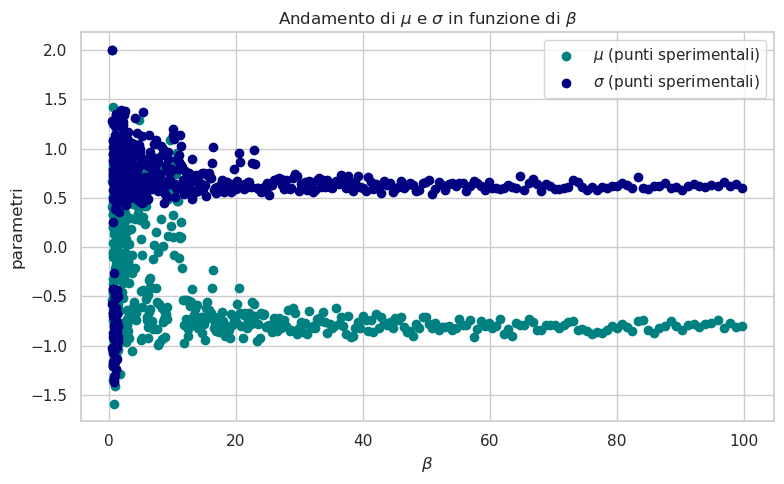

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati (salta eventuale header)
data = np.loadtxt("parameters.dat", comments="#")
beta = data[:,1]
mu = data[:,2]
sigma = data[:,3]

plt.figure(figsize=(8,5))
plt.scatter(beta, mu, color='teal', label=r'$\mu$ (punti sperimentali)')
plt.scatter(beta, sigma, color='navy', label=r'$\sigma$ (punti sperimentali)')
plt.xlabel(r'$\beta$')
plt.ylabel(r'parametri')
plt.title(r'Andamento di $\mu$ e $\sigma$ in funzione di $\beta$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

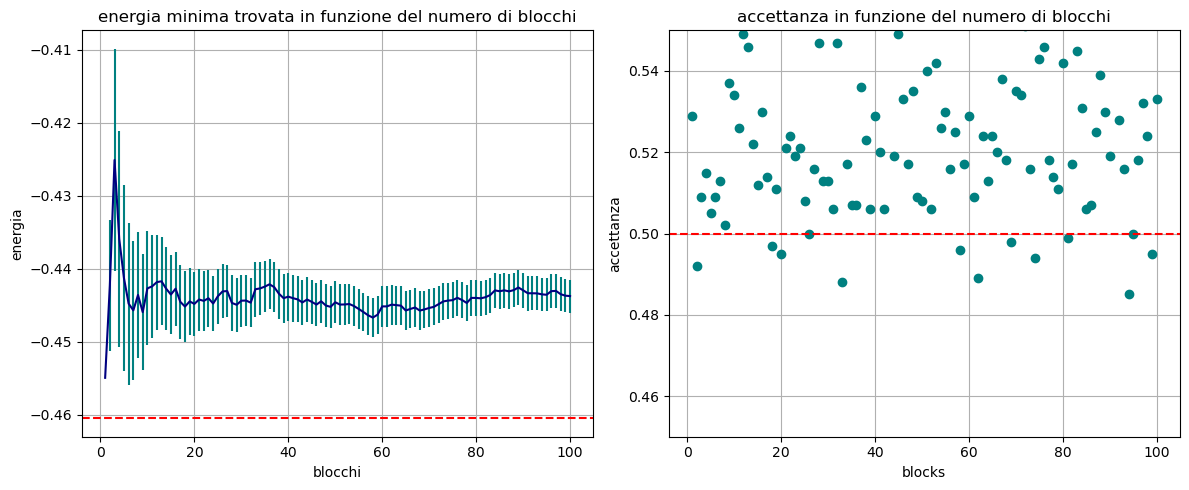

In [17]:
import numpy as np
import matplotlib.pyplot as plt



# Carico i dati
data_ene = np.loadtxt("final_energy.dat")
data_acc = np.loadtxt("acceptance_SA.dat")


x = np.arange(1, data_ene.shape[0] + 1)

energia = data_ene[:,2]
errore_ene = data_ene[:,3]

accettanza = data_acc[:,1]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primo grafico: andamento energia finale in funzione dei blocchi
axs[0].errorbar(x, energia, yerr=errore_ene,color='navy', ecolor='teal')
axs[0].set_xlabel('blocchi')
axs[0].set_ylabel('energia')
axs[0].axhline(y=-0.46046, color='red', linestyle='--', linewidth=1.5, label='Matrice')
axs[0].grid(True)
axs[0].set_title('energia minima trovata in funzione del numero di blocchi')

# Secondo grafico: andamento accettanza in funzione dei blocchi
axs[1].plot(x, accettanza, marker='o', linestyle= 'none', color='teal')
axs[1].set_xlabel('blocks')
axs[1].set_ylabel('accettanza')
axs[1].set_ylim(0.45, 0.55)
axs[1].axhline(y=0.5, color='red', linestyle='--', linewidth=1.5, label='Matrice')
axs[1].grid(True)
axs[1].set_title('accettanza in funzione del numero di blocchi')

plt.tight_layout()
plt.show()

Sono riportati i grafici dell'accettanza e dell'andamento dell'energia in funzione dei blocchi per la $\Psi_T^{\sigma,\mu}(x)$ di stato fondamentale.

Il valore di convergenza dell'energia all'aumentare dei blocchi è confrontato con il valore ottenuto dalla soluzione matriciale fornita nella sezione supplementare della consegna. I due valori non sono statisticamente compatibili, per cui probabilmente lo stato trovato non è il **vero** stato fondamentale, ma qualcosa che ci si avvicina molto.

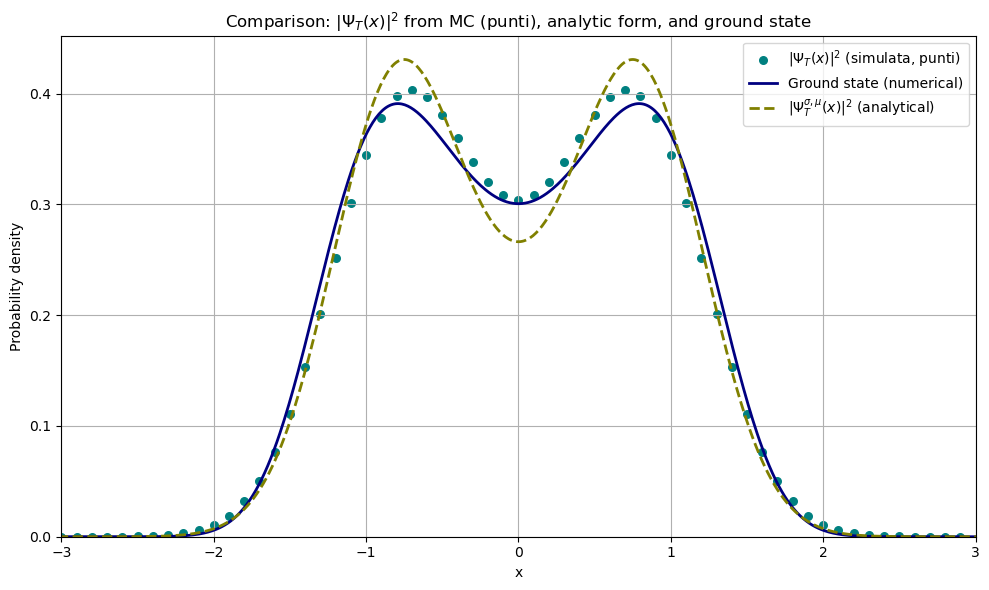

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Carica i dati da psi.dat (x, |Psi_T(x)|^2) ---
x_psi, psi2_psi = np.loadtxt("psi.dat", unpack=True)

# --- Parametri della trial wavefunction ---
mu = -0.802589
sigma = 0.596878

def psi_trial_sq(x, mu, sigma):
    psi = np.exp(-(x - mu)**2 / (2 * sigma**2)) + np.exp(-(x + mu)**2 / (2 * sigma**2))
    return psi**2

# --- Soluzione numerica tramite diagonalizzazione ---
def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 10
N = 1000
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0]
V = Vpot(x)

CDiff = np.diag(np.ones(N-1), -1) - 2*np.diag(np.ones(N), 0) + np.diag(np.ones(N-1), 1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E, psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi / np.sqrt(dx)  # Normalizza

# --- Calcola la trial wavefunction analitica normalizzata ---
psi_T_sq = psi_trial_sq(x, mu, sigma)
psi_T_sq /= np.trapezoid(psi_T_sq, x)

# --- Normalizza anche i dati di psi.dat per confronto ---
psi2_psi /= np.trapezoid(psi2_psi, x_psi)

# --- Plot ---
plt.figure(figsize=(10, 6))

plt.scatter(x_psi, psi2_psi, color='teal', s=30, label=r"$|\Psi_T(x)|^2$ (simulata, punti)")
plt.plot(x, (psi[0])**2, color='navy', linewidth=2, label="Ground state (numerical)")
plt.plot(x, psi_T_sq, linestyle='--', color='olive', linewidth=2, label=r"$|\Psi_T^{\sigma,\mu}(x)|^2$ (analytical)")

plt.title(r"Comparison: $|\Psi_T(x)|^2$ from MC (punti), analytic form, and ground state")
plt.xlabel("x")
plt.ylabel("Probability density")
plt.grid(True)
plt.xlim((-3, 3))
plt.ylim(bottom=0)
plt.legend()
plt.tight_layout()
plt.show()

Ho riportato infine il confronto tra $|\Psi_T^{\sigma,\mu}(x)|^2$ ottenuta con i dati della simulazione, con la soluzione analitica e con la soluzione matriciale presente nella consegna.